# Model-1 (Logistic Regression application for the dataset)

In [1]:
import pandas as pd
import numpy as np

# Importing the data

In [2]:
train_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_training_data.csv')
test_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_test_data.csv')
val_df=pd.read_csv('D:\Jio Term 2\ML\ML_Project\project_data\sepsis_validation_data.csv')

# Analyzing the data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,1,0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
2,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
3,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
4,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,7.9,113.0,2.5,0.0,78.0,0.0,2.5,4.4,5.1,0.0,0.0,27.8,9.7,0.0,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0


In [5]:
#after imputation of missing values the columns which get the least unique values need to be dropped,hence we will check unique
# value count & drop those columns

columns_to_drop=[]
for column in train_df.columns:
    vc=len(train_df[column].value_counts().unique())
    if vc<=5:
         columns_to_drop.append(column)
    else:
        pass
print(columns_to_drop)

['EtCO2', 'Gender', 'Unit1', 'Unit2', 'SepsisLabel']


In [6]:
#here we cannot drop ['Gender','SepsisLabel']
items_to_remove=['Gender','SepsisLabel']
for column in columns_to_drop:
    if column in items_to_remove:
        columns_to_drop.remove(column)
    else:
        pass
print(columns_to_drop)

['EtCO2', 'Unit1', 'Unit2']


In [7]:
data=[train_df,test_df,val_df]

def drop_columns(df_list,col_list):
    for df in df_list:
        df.drop(col_list,axis=1,inplace=True)

In [8]:
drop_columns(data,columns_to_drop)

In [9]:
#now that we have dropped the unwanted columns, we will split the data into dependent & independent features
#here sepsis lable is the the dependent column




def dep_ind(df):
    
    
    X=np.array(df[df.columns[:-1]].values)
    y=np.array(df[df.columns[-1]].values)
    
    return X,y

# Logistic Regression for classification

In [10]:
X_train,y_train = dep_ind(train_df)
X_test,y_test = dep_ind(test_df)
X_val,y_val = dep_ind(val_df)




In [11]:
#Define scaler (StandardScaler). Fit the scaler on training data. Only scale the independent features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)


# Create a LogisticRegression

In [12]:
# import packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import random

from sklearn import linear_model, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from plot_metric.functions import BinaryClassification

In [13]:
#create a logistic regression object & fit the data


logreg = linear_model.LogisticRegression(C=10, solver='saga', max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, solver='saga')

In [14]:
yhat=logreg.predict(X_val)
accuracy=np.mean(yhat == y_val)
print(accuracy)

0.9764404695173475


# Interpreting the weight vector

In [15]:
#now using the coefficients we will interpret the features that capture the maximum weigtage

Weights=logreg.coef_.ravel()

In [16]:
Weights

array([ 0.23706542,  0.07667799, -0.04006075, -0.31591581,  0.07569611,
        0.04531739,  0.16285771,  0.09361455, -0.28545352,  0.14058366,
       -0.08452161,  0.32552987, -0.23189832, -0.02890247,  0.01873223,
        0.0151265 ,  0.16958729, -0.01109481,  0.11721554, -0.01366847,
       -0.00249702,  0.06669642, -0.00158846, -0.03735196, -0.10862398,
        0.00914794, -0.13922539,  0.00957657, -0.21633186,  0.07167413,
        0.05827811, -0.00693935, -0.09114942,  0.01141596,  0.10252878,
       -0.06619283,  0.41246544])

<StemContainer object of 3 artists>

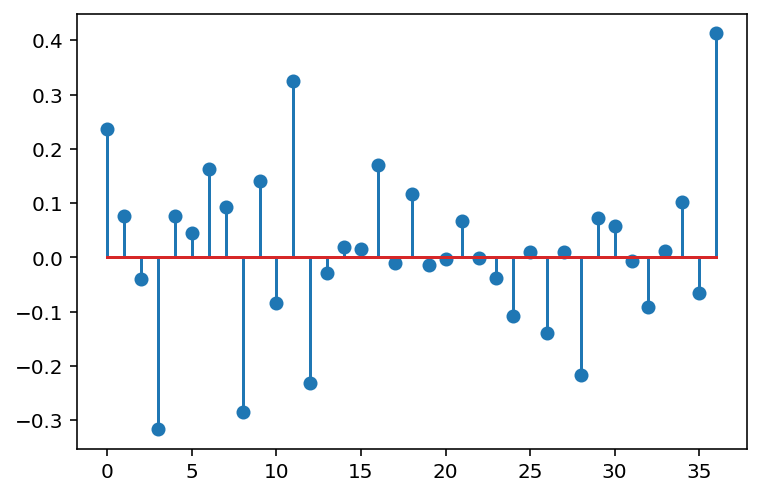

In [17]:
plt.stem(Weights)

In [18]:
# now we will map the feature with the weights coefficients

c=list(train_df.columns[:-1])
dict= {}
for i in range(0,len(Weights)):
    dict[c[i]]=Weights[i]
    
print(dict)

    

{'HR': 0.23706541724059754, 'O2Sat': 0.07667799079980134, 'Temp': -0.040060746312792495, 'SBP': -0.31591580928295426, 'MAP': 0.07569611386028197, 'DBP': 0.045317388853900645, 'Resp': 0.16285770861972, 'BaseExcess': 0.09361455028838812, 'HCO3': -0.28545351845820593, 'FiO2': 0.14058365926207966, 'pH': -0.0845216104366568, 'PaCO2': 0.32552987274927303, 'SaO2': -0.23189832129951177, 'AST': -0.028902470979153168, 'BUN': 0.018732227156996042, 'Alkalinephos': 0.015126497203853406, 'Calcium': 0.16958729476121004, 'Chloride': -0.01109480630793943, 'Creatinine': 0.11721554258569532, 'Bilirubin_direct': -0.013668465809998673, 'Glucose': -0.0024970244996676124, 'Lactate': 0.0666964183635274, 'Magnesium': -0.0015884599509316635, 'Phosphate': -0.03735195631798177, 'Potassium': -0.10862398064631544, 'Bilirubin_total': 0.009147939623492496, 'TroponinI': -0.13922538838649812, 'Hct': 0.009576572443538104, 'Hgb': -0.21633186162180723, 'PTT': 0.07167413195073752, 'WBC': 0.05827811119989933, 'Fibrinogen': 

In [19]:
#The most significant features are [ICULOS,PaCO2,SBP,HCO3]

# Hyperparametric Tuning

In [20]:
#now we need too identify the hyperparameter
#we have used 2 hyperparamter 1)-C, 2) -penalty 3)-max_itertaions
#we need to select a  range of values for which we will need to run these

l=linear_model.LogisticRegression()

pen=['l1','l2']
C=np.logspace(-1,2,10)


param_grid={'penalty':pen,'C':C}

from sklearn.model_selection import GridSearchCV

logisitic_class_best=GridSearchCV(logreg,param_grid,cv=3,scoring='accuracy')
logisitic_class_best.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=10, max_iter=1000, solver='saga'),
             param_grid={'C': array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [21]:
best_model=logisitic_class_best.fit(X_train,y_train)

In [22]:
best_model.best_params_

{'C': 0.1, 'penalty': 'l1'}

# Testdata prediction & performance

In [23]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [24]:
yhat_test=best_model.predict(X_test)
accuracy_test=np.mean(y_test==yhat_test)
print(accuracy_test)

0.9759546307408847


In [25]:
#accuracy cannot be considered as a good performance metric,since it is an imbalanced dataset.
# we need to go for other perfomace metrics, such as confusion matrix,precision & recall.

#confusion matrix spits a (2*2) matrix by comparing the given test outcome, to out predicted test putcome

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat_test)



array([[115451,    232],
       [  2613,     22]], dtype=int64)

In [26]:
# in our sepsis case if a patient is sepsis positive, our model cannot give the outcome as sepsis negative, since
# that will endanger the patient from recieving proper treatment, therefore we need to reduce the false positive
# there fore we will go for precision & recall, precision=TP/TP+FP, FP need to be low for our case, hence precison need high.

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision_score(y_test,yhat_test)
recall_score(y_test,yhat_test)
f1_score(y_test,yhat_test)


0.01523018345448252

In [27]:
#prediction probability

yhat_prob=best_model.predict_proba(X_test)[:,1]

#visualize
!pip install plot_metric
from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_test,yhat_prob,labels=['nonSepsis','Sepsis'])






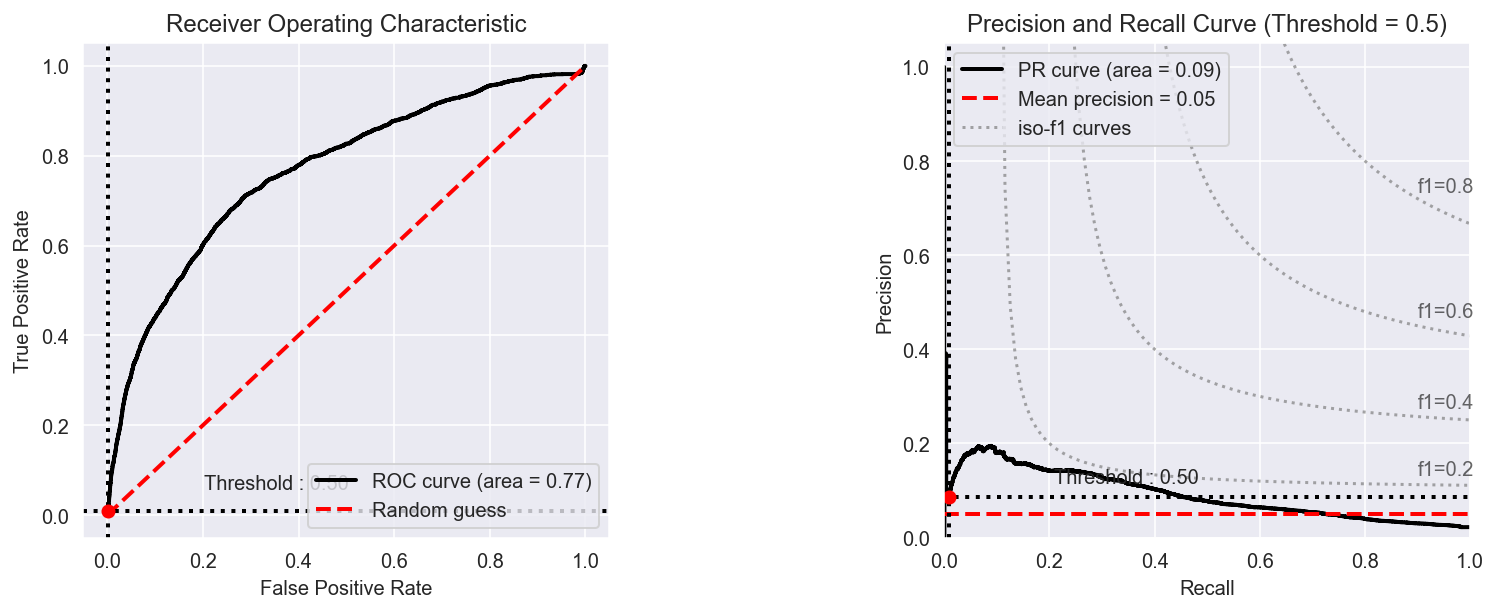

In [28]:
#plots

plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid(shape=(2,6), loc=(0,3), colspan=2)
bc.plot_precision_recall_curve()
plt.show()

In [29]:
bc.print_report()


                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

   nonSepsis       0.98      1.00      0.99    115683
      Sepsis       0.09      0.01      0.02      2635

    accuracy                           0.98    118318
   macro avg       0.53      0.50      0.50    118318
weighted avg       0.96      0.98      0.97    118318



#  Model -2 Unsupervised_learning_PCA

In [30]:
#Concat X_tr & X_vl as X, y_train,y_val as yto have a complete dataset. Fit PCA to visualize how many components are possible
# & how these components explain the variance in the data
# as it is an unsupervised learning problem , we will use only X

In [31]:
X=np.concatenate((X_train,X_val), axis=0)
y=np.concatenate((y_train,y_val), axis=0)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA(whiten=True)
X_dimred=pca.fit_transform(X)

#since 2 principal components were used, each data point will be represented using a 2d vector, each a principal component value
#let us plot to see how the data variance is captured along the principal components

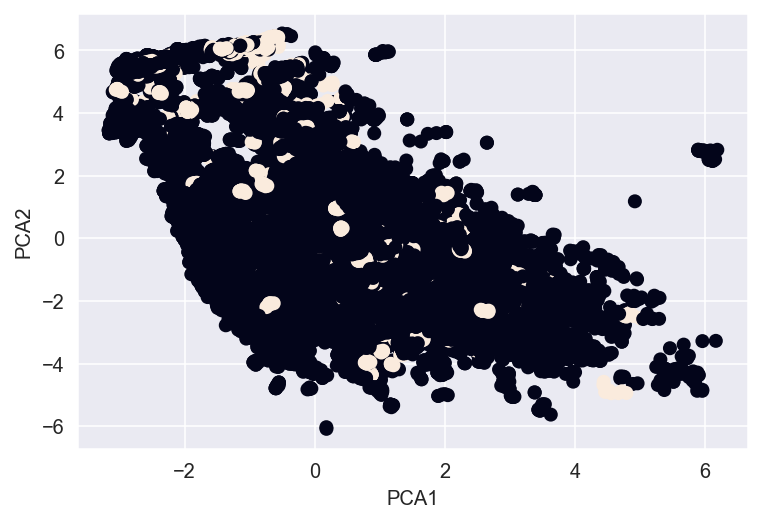

In [34]:
plt.scatter(X_dimred[:,0],X_dimred[:,1],c=y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [35]:
#let us look at the variance captured by each of the principal components
variance=pca.explained_variance_ratio_

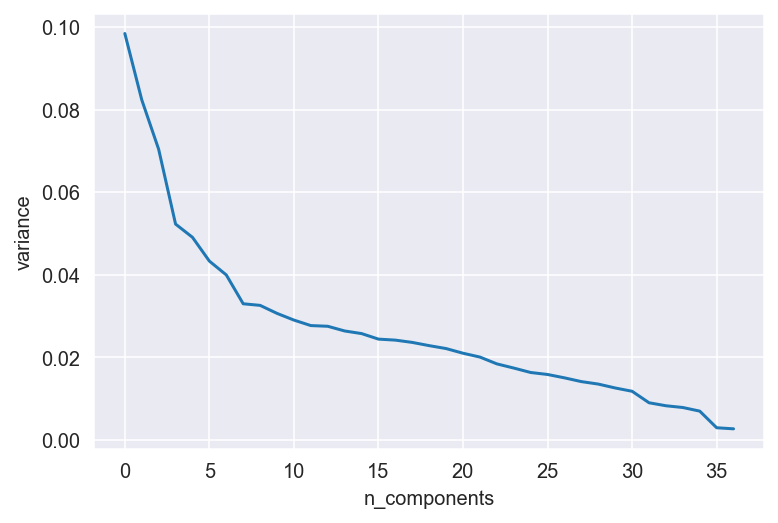

In [36]:
#let us look at the optimimim no of principal components for explainination of the data
plt.plot(range(0,len(pca.explained_variance_ratio_)),variance)
plt.xlabel('n_components')
plt.ylabel('variance')
plt.show()

# Hyperparametric Tuning

In [37]:
# create a logistic regression model and PCA object
logreg = linear_model.LogisticRegression(C=0.1,solver='saga', max_iter=1000)
pca = PCA(svd_solver='randomized')

# create a pipeline
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [38]:
# create hyperparameter search space
# create regularization penalty space

# create regularization hyperparameter space
# C = np.logspace(-1, 2, 10)

# create regularization component space
n_components = [9,15,20]

# create hyperparameter options
hyperparameters = {'pca__n_components': n_components}

In [39]:
from sklearn.pipeline import Pipeline

# create grid search using 2-fold cross validation
clf = GridSearchCV(pipe, hyperparameters, cv=2, verbose=0, return_train_score=True)
# clf.get_params().keys()
# best model


In [40]:
best_model_pca_logistic = clf.fit(X,y)

In [41]:
best_model_pca_logistic.best_score_
best_model_pca_logistic.best_params_

{'pca__n_components': 15}

# Test data Prediction & performance after application of PCA to logisitic Regression

In [42]:
yhat_test_pca=best_model_pca_logistic.predict(X)
accuracy_test=np.mean(y==yhat_test_pca)
print(accuracy_test)

0.978330002425635


In [43]:
confusion_matrix(y,yhat_test_pca)

array([[657419,     59],
       [ 14503,      8]], dtype=int64)

In [44]:
# in our sepsis case if a patient is sepsis positive, our model cannot give the outcome as sepsis negative, since
# that will endanger the patient from recieving proper treatment, therefore we need to reduce the false positive
# there fore we will go for precision & recall, precision=TP/TP+FP, FP need to be low for our case, hence precison need high.


precision_score(y,yhat_test_pca)
recall_score(y,yhat_test_pca)
f1_score(y,yhat_test_pca)

0.0010975442447523668

In [45]:
#prediction probability

yhat_prob_pca_lr=best_model_pca_logistic.predict_proba(X)[:,1]

#visualize
# !pip install plot_metric
# from plot_metric.functions import BinaryClassification
bc_pca_lr=BinaryClassification(y,yhat_prob_pca_lr,labels=['nonSepsis','Sepsis'])


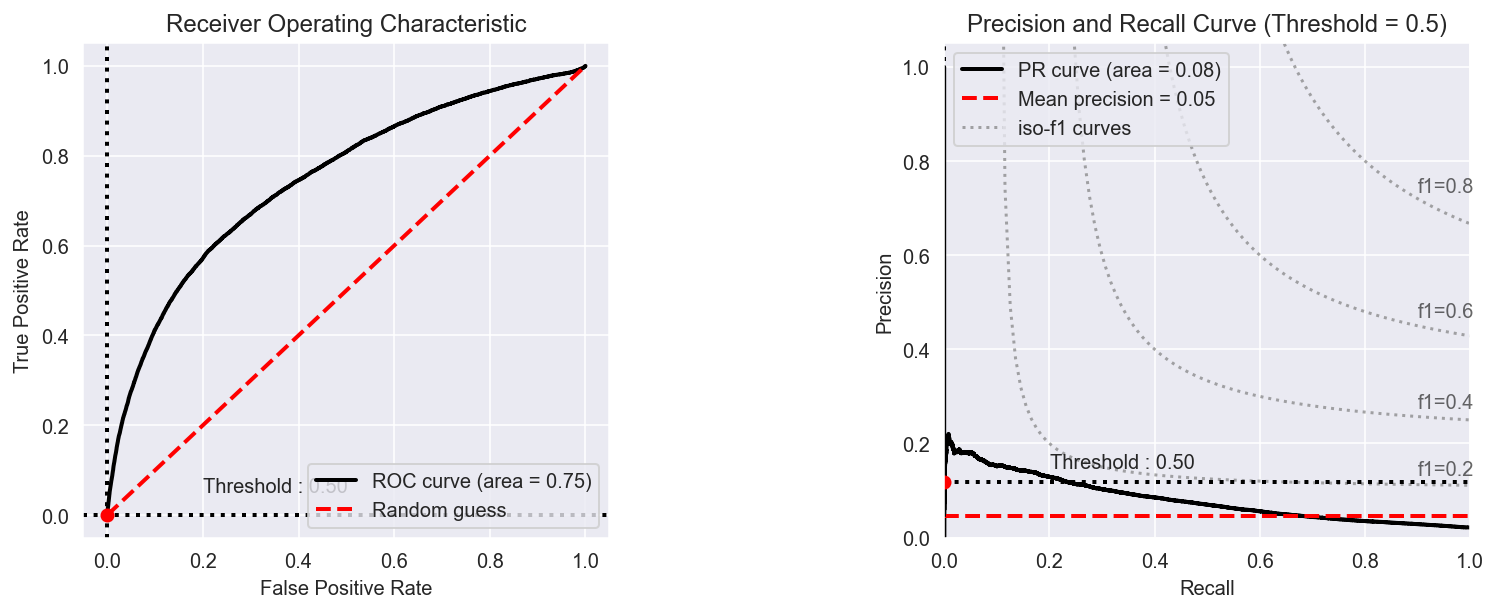

In [46]:
#plots

plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc_pca_lr.plot_roc_curve()
plt.subplot2grid(shape=(2,6), loc=(0,3), colspan=2)
bc_pca_lr.plot_precision_recall_curve()
plt.show()

In [47]:
bc_pca_lr.print_report()

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

   nonSepsis       0.98      1.00      0.99    657478
      Sepsis       0.12      0.00      0.00     14511

    accuracy                           0.98    671989
   macro avg       0.55      0.50      0.50    671989
weighted avg       0.96      0.98      0.97    671989



# TESTING MODEL ON VALIDATION SET TRAININGB


In [48]:
setB_validation=pd.read_csv('D:\\Jio Term 2\\ML\ML_Project\\project_data\\sepsis_testB_data.csv')

In [49]:
setB_validation.drop(columns_to_drop, axis=1, inplace=True)

In [50]:
X_validation_setB,y_validation_setB = dep_ind(setB_validation)

In [51]:
X_validation_setB.shape

(762019, 37)

In [52]:
#Of all the models applied LogisticRegression with PCA  has given the highest precision score & f1 score
# hence we will proceed with 

y_pred_setB=best_model.predict(X_validation_setB)

confusion_matrix(y_validation_setB,y_pred_setB)

array([[575645, 175594],
       [  5791,   4989]], dtype=int64)

# Performance on SetB validation data

In [53]:
y_pred_prob_setB=best_model.predict_proba(X_validation_setB)[:,1]
precison,recall,threshold=precision_recall_curve(y_validation_setB,y_pred_setB)
area_under_curve = auc(recall, precison)
fpr, tpr, thresholds = roc_curve(y_validation_setB, y_pred_setB)
auroc = auc(fpr, tpr)

In [54]:
print(classification_report(y_validation_setB,y_pred_setB))
print('f1score:', f1_score(y_validation_setB,y_pred_setB))
print('Precision:', precision_score(y_validation_setB,y_pred_setB))
print('Recall:', recall_score(y_validation_setB,y_pred_setB))
print('accuraccy:', accuracy_score(y_validation_setB,y_pred_setB))
print('auc:',auroc)

              precision    recall  f1-score   support

           0       0.99      0.77      0.86    751239
           1       0.03      0.46      0.05     10780

    accuracy                           0.76    762019
   macro avg       0.51      0.61      0.46    762019
weighted avg       0.98      0.76      0.85    762019

f1score: 0.05214174108892524
Precision: 0.027627185283221566
Recall: 0.4628014842300557
accuraccy: 0.7619678774413762
auc: 0.6145311440244068


Text(0.5, 1.0, 'precision vs recall_logistic')

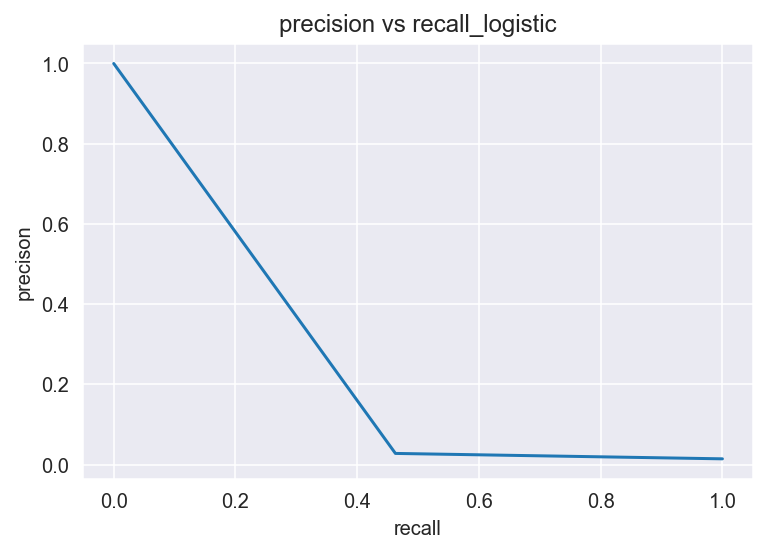

In [55]:
plt.plot(recall,precison)
plt.xlabel('recall')
plt.ylabel('precison')
plt.title('precision vs recall_logistic')

# PLOT METRICS

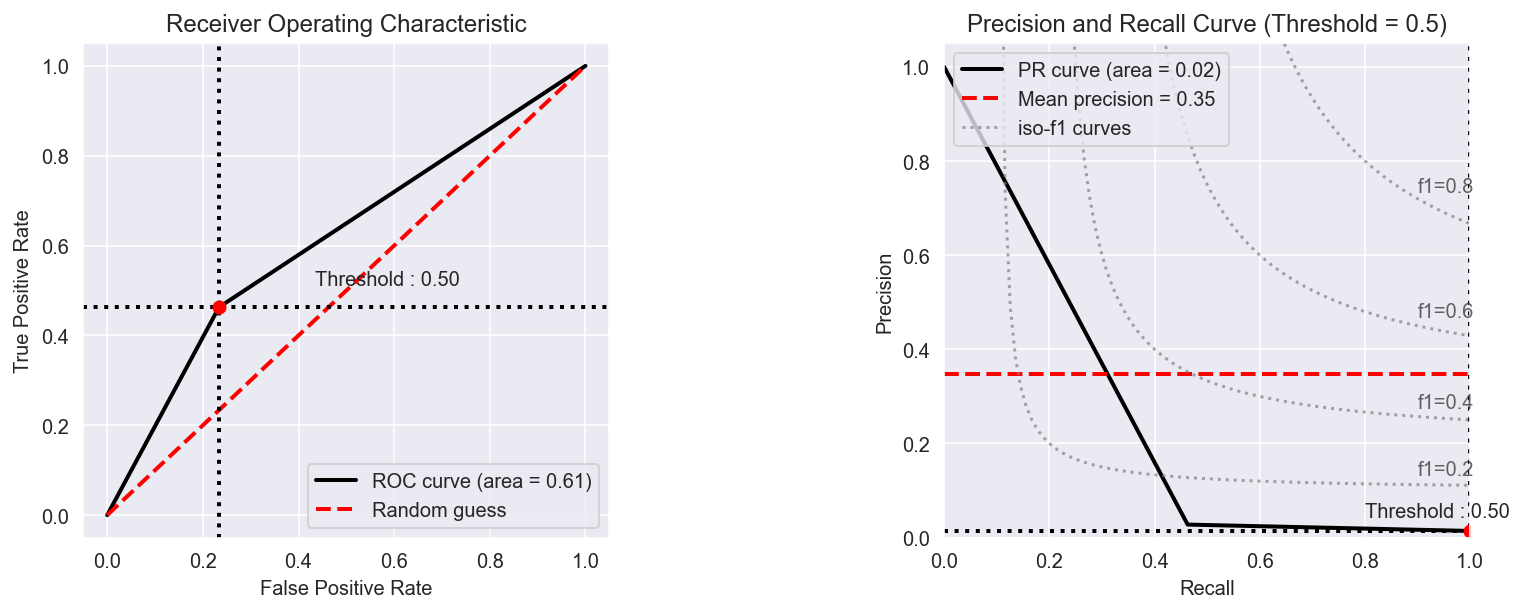

In [56]:
#plots

from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_validation_setB,y_pred_setB,labels=['nonSepsis','Sepsis'])


plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid(shape=(2,6), loc=(0,3), colspan=2)
bc.plot_precision_recall_curve()
plt.show()